# Atelier 

Noms du groupe : 
1. OISSAFE Imad 
2. LATRACH El Habib
3. ENNASTY Hamza

     l'objectif: 
      - Éxaminer la corrélation entre l'index h (nombre maximum d'articles avec au moins h citations) et d'autres variables, afin de mesurer l'influence académique d'un chercheur.


# Partie 1: Régression linéaire simple

## Étape 1 : Préparation des Données

1-Importez les bibliothèques nécessaires, telles que numpy, pandas, statsmodels, seaborn, matplotlib.pyplot, et scipy.stats.

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import bartlett
from statsmodels.stats.diagnostic import het_white
import scipy.stats as stats
import xlrd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

2-Charger les données à partir d'un fichier Excel

In [3]:
df = pd.read_excel('./RegerstionData.xlsx')
df

,Chercheur,nombre_Publications,nombre_citations,H_Index,I10_Index
0,Aziz Ouaarab,20,751,8,6
1,Essaid El Bachari,47,433,9,9
2,GAMRANI,268,2129,27,58
3,Hajar Mousannif,105,2928,22,30
4,HAMZA LAMSYEHE,46,285,8,8
5,Hassan Chehouani,100,520,13,17
6,HIBA ASRI,42,990,7,6
7,IBNELOUAD Aouatif,0,57,4,2
8,Jabrane Amaghouss,56,216,7,6
9,Khalid OUFDOU,258,2983,33,65


` On filtre les données du DataFrame pour ne conserver que les lignes où la colonne "nombre_citations" est inférieure ou égale à 4000 `

In [4]:
df =df[df['nombre_citations']<=4000]

## Étape 2 : Sélection des variables

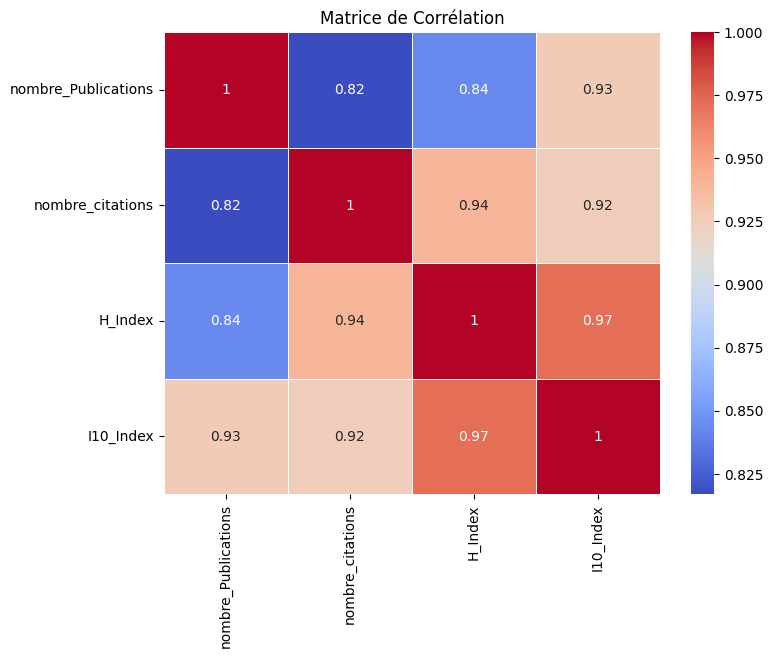

In [5]:

# Supposons que `df` soit votre DataFrame
data = df.drop('Chercheur', axis=1)

# Calcul de la matrice de corrélation
corr_matrix = data.corr()

# Création d'un heatmap avec Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Matrice de Corrélation")
plt.show()


Pour sélectionner les variables X et Y, on opte pour des variables présentant une corrélation étroite, approchant 1.

## Étape 3 : Nuage de points

In [6]:
# on choisit notre variable dépendante Y et notre variable indépendante X
X = df['nombre_citations']
Y = df['H_Index']

Un nuage de points est créé pour visualiser la relation entre (H_Index) et (nombre_citations). Le nuage de points est affiché avec des axes et une légende.

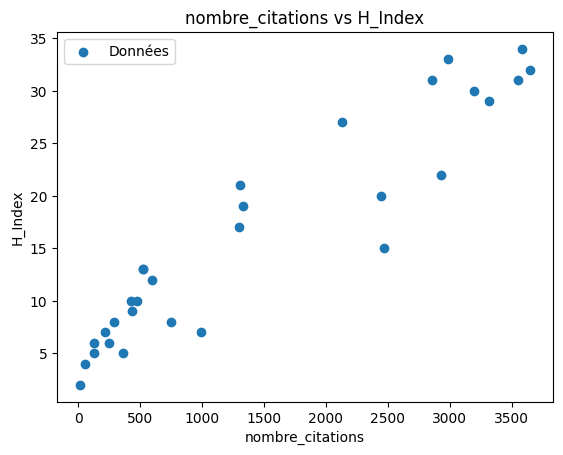

In [7]:

plt.scatter(X, Y, label="Données")
plt.xlabel('nombre_citations')
plt.ylabel('H_Index')
plt.title('nombre_citations vs H_Index')
plt.legend()
plt.show()


les points semblent alignés de manière linéaire, cela indiquer une relation linéaire positive (croissante) entre les variables. Cela suggère que la régression linéaire pourrait être un bon modèle pour ces données.

## Étape 4 : Ajustement du modèle de régression linéaire

Un modèle de régression linéaire simple est ajusté en utilisant la méthode des moindres carrés ordinaires (OLS) de la bibliothèque statsmodels.

In [8]:
X = sm.add_constant(X)

# Créer le modèle de régression linéaire
model = sm.OLS(Y, X).fit()


## Étape 5 : Affichage du nuage de points avec la droite de régression

Le nuage de points est affiché avec une droite de régression (en rouge) qui représente la relation linéaire entre (H_Index) et (nombre_citations)

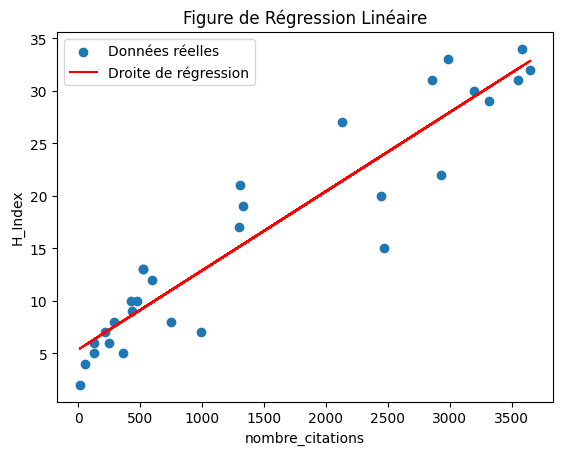

In [9]:
# Faire des prédictions
predictions = model.predict(X)

# Tracer les points de données et la droite de régression
plt.scatter(X['nombre_citations'], Y, label="Données réelles")
plt.plot(X['nombre_citations'], predictions, color='red', label='Droite de régression')
plt.title("Figure de Régression Linéaire")
plt.xlabel("nombre_citations")
plt.ylabel("H_Index")
plt.legend()
plt.show()


 la droite de régression suit bien la tendance des points de données réels, cela suggère que le modèle capture correctement la relation linéaire entre la caractéristique d'entrée et la variable dépendante ("H_Index" dans ce cas).

## Étape 6 : Tests de régression

`Plusieurs tests sont effectués pour évaluer la qualité du modèle de régression :`


- Le test de Durbin-Watson est utilisé pour détecter l'autocorrélation des résidus.
- Le test de White est utilisé pour détecter l'hétéroscédasticité des résidus.
- Le test de normalité de Shapiro-Wilk est utilisé pour évaluer la normalité des résidus.

In [10]:

# Calculer les résidus
residuals = model.resid

# Test de Durbin-Watson
dw_test = sms.durbin_watson(residuals)
print("Test de Durbin-Watson :", dw_test)

# Interprétation du test
if 1.5 < dw_test < 2.5:
    print("Pas d'autocorrélation positive ou négative des résidus.")
else:
    print("Autocorrélation possible des résidus.")


Test de Durbin-Watson : 2.432130097771795
Pas d'autocorrélation positive ou négative des résidus.


In [11]:
# Test de White pour l'hétéroscédasticité

white_test_result = het_white(model.resid, model.model.exog)

white_test_statistic = white_test_result[0]
white_test_p_value = white_test_result[1]

# Si la version de statsmodels est inférieure à 0.12, la sortie du test de White est différente
if len(white_test_result) > 2:
    f_test_p_value = white_test_result[2]
else:
    f_test_p_value = None

# Afficher les résultats du test
print("Test de White - Statistique du test:", white_test_statistic)
print("Test de White - Valeur p:", white_test_p_value)

# Interprétation du test
if white_test_p_value > 0.05:
    print("Pas d'hétéroscédasticité significative détectée.")
else:
    print("Hétéroscédasticité significative détectée ")

Test de White - Statistique du test: 11.680392305505688
Test de White - Valeur p: 0.0029082721042804553
Hétéroscédasticité significative détectée 


In [12]:
# Test de normalité de Shapiro-Wilk
shapiro_test_statistic, shapiro_test_p_value = shapiro(model.resid)

print("Test de Shapiro-Wilk - Statistique du test:", shapiro_test_statistic)
print("Test de Shapiro-Wilk - Valeur p:", shapiro_test_p_value)

# Interprétation du test
if shapiro_test_p_value > 0.05:
    print("Normalite des residus .")
else:
    print("Non-normalité significative des résidus détectée.")

Test de Shapiro-Wilk - Statistique du test: 0.976029098033905
Test de Shapiro-Wilk - Valeur p: 0.7130305767059326
Normalite des residus .


## Étape 7 : Histogramme des résidus avec courbe de distribution normale

Un histogramme des résidus est affiché pour visualiser leur distribution. Il est superposé avec une courbe de distribution normale pour évaluer la normalité des résidus.

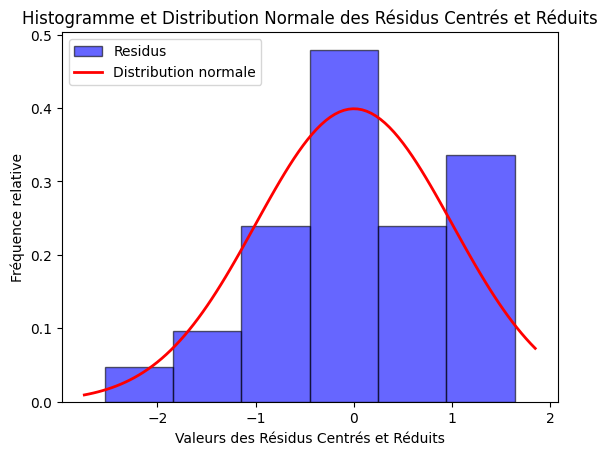

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Calcul des résidus centrés et réduits
residuals = model.resid
residuals_mean = residuals.mean()
residuals_std = residuals.std()

# Centrer et réduire les résidus
centered_resid = (residuals - residuals_mean)
standardized_resid = centered_resid / residuals_std

# Histogramme des résidus centrés et réduits avec courbe de distribution normale
# nombre de bins égal à la racine carrée du nombre total d'observations.
# Pour 30 observations, cela pourrait être autour de 5 ou 6 bins.
plt.hist(standardized_resid, bins=6, color='blue', edgecolor='black', density=True, alpha=0.6, label='Residus')

mu, std = 0, 1  # Moyenne et écart-type pour une distribution normale centrée et réduite
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=2, label='Distribution normale', color='red')

plt.title('Histogramme et Distribution Normale des Résidus Centrés et Réduits')
plt.xlabel('Valeurs des Résidus Centrés et Réduits')
plt.ylabel('Fréquence relative')
plt.legend()
plt.show()


l'histogramme des résidus suit approximativement la forme de la distribution normale, cela suggère que les résidus sont normalement distribués
Une distribution normale des résidus est un indicateur positif pour la validité des résultats de la régression linéaire.

## Étape 8 : Calcul de l'Erreur quadratique moyenne (MSE).

In [14]:
# Calculer les valeurs prédites par le modèle
predictions = model.predict(X)

# Calculez l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(Y, predictions)

# Affichez le MSE
print("l'Erreur quadratique moyenne = ", mse)
print("Cela signifie que, en moyenne, chaque prédiction de notre modèle est éloignée de la valeur réelle de", round(mse, 2), "unités")

l'Erreur quadratique moyenne =  12.082342144665004
Cela signifie que, en moyenne, chaque prédiction de notre modèle est éloignée de la valeur réelle de 12.08 unités



## Étape 9 : Coefficient de détermination (R²).

In [15]:
from sklearn.metrics import r2_score

predictions = model.predict(X)
r_squared = r2_score(Y, predictions)

# Affichez le MSE
print("Coefficient de détermination = ", r_squared)

Coefficient de détermination =  0.8837789328139187


Un coefficient de détermination (R²) de 0.88 indique que notre modèle de régression linéaire explique environ 88.37% de la variance totale de la variable dépendante.
R² est proche de 1 Donc "H_Index"(Y) est bien expliquée  par "nombre_citations" (X) 

## Étape 10 : Résumé du modèle

Le résumé du modèle de régression linéaire est affiché, montrant les coefficients, les statistiques de test et d'autres informations liées au modèle.

In [18]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                H_Index   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     212.9
Date:                Wed, 27 Dec 2023   Prob (F-statistic):           1.30e-14
Time:                        00:27:40   Log-Likelihood:                -79.944
No. Observations:                  30   AIC:                             163.9
Df Residuals:                      28   BIC:                             166.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.3618      0.992  

Résumé Global du Modèle

`R-squared (R²): 0.69`

Environ 69.7% de la variance dans la variable dépendante (H_Index) est expliquée par le modèle. Un R² élevé suggère que le modèle est capable de capturer une grande partie de la variabilité des données.


`Adj. R-squared (R² ajusté): 0694`

R² ajusté tient compte du nombre de prédicteurs dans le modèle. Un R² ajusté proche du R² indique que le modèle n'est probablement pas sura
justé.


`F-statistic 310.0`

Une statistique de 310 suggère que le modèle global est statistiquement significative.

`const (constane): 2.1690`

L'intercept du modèle, représentant la valeur attendue de la variable dépendante lorsque toutes les variables indépendantes sont é
gales à zéro.

`Explained by: Social spport: 2.9154`

L'augmentation d'une unité de la variable "Total_Citedby" est associée à une augmentation de 2.9154 unités dans la variable dépendante "H_Index".

`Omnibus: 2.220`

Un test d'omnibus évalue l'omnibus de la distribution des résidus. La p-value élevée (0.330) suggère que la distribution des résidus suit probablement une distribution normale

`Durbin-Watson: 1.467`

Un test de Durbin-Watson évalue l'autocorrélation des résidus. La valeur (1.467) indique une faible autocorrélation.

`Jarque-Bera (JB): 2.255`

Un test de Jarque-Bera évalue la normalité des résidus. La p-value élevée (0.324) suggère que les résidus peuvent suiv
re une distribution normale.


**Conclusion**
Le modèle semble être statistiquement significatif, avec un R² de 0.697 indiquant une bonne capacité à expliquer la variance de la variable dépendante. Les coefficients individuels sont tous significatifs, et les tests de distribution des résidus montrent des résultats généralement satisfaisants.

# Partie 2: Régression linéaire multiple

## Étape 2 : Sélection des variables.

In [21]:
# Récupérer l'ensemble des valeurs de la variable cible
Y1 = df["H_Index"]
# Récupérer les variables prédictives (on en a 2)
X1 = df[['nombre_citations','I10_Index']]


## Étape 3 : Nuage de points

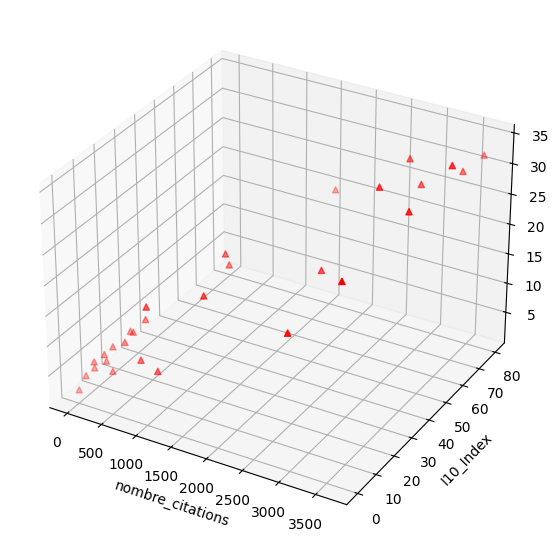

In [23]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,2,1, projection='3d')
ax.scatter(X1["nombre_citations"], X1["I10_Index"], Y1, c='r', marker='^')
 
ax.set_xlabel('nombre_citations')
ax.set_ylabel('I10_Index')
ax.set_zlabel('H_Index)')
 
plt.show()


## Étape 4 : Ajustement du modèle de régression linéaire

In [24]:
X = sm.add_constant(X1)
model2 = sm.OLS(Y1, X).fit()

## Étape 5 : Affichage du nuage de points avec la droite de régression.

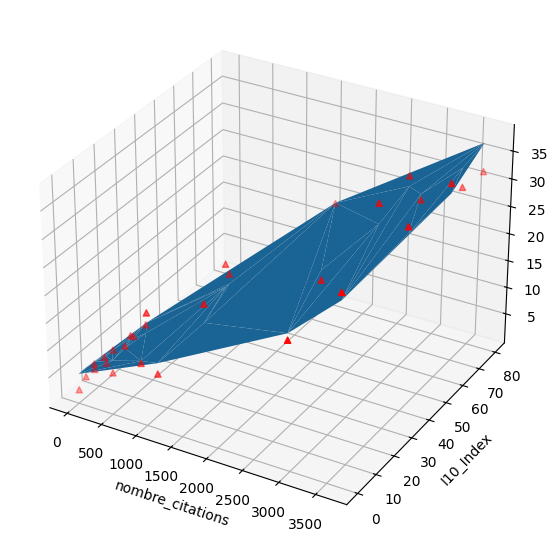

In [29]:

# Effectuez les prédictions
Y_predict = model2.predict(X)

# Créez une figure avec une taille personnalisée
fig = plt.figure(figsize=(15, 10))

# Ajoutez un sous-graphique 3D
ax = fig.add_subplot(1, 2, 1, projection='3d')

# Nuage de points avec les données réelles
ax.scatter(df["nombre_citations"], df["I10_Index"], df["H_Index"], c='r', marker='^')

# Ajoutez des étiquettes aux axes
ax.set_xlabel('nombre_citations')
ax.set_ylabel('I10_Index')
ax.set_zlabel('H_Index)')

# Tracé de la surface triangulée avec les prédictions
ax.plot_trisurf(df["nombre_citations"], df["I10_Index"], Y_predict)

# Affichez la figure
plt.show()

## Étape 6 : Tests de régression

Plusieurs tests sont effectués pour évaluer la qualité du modèle de régression :
 1. Le test de Durbin-Watson est utilisé pour détecter l'autocorrélation des résidus. 
 2. Le test de White est utilisé pour détecter l'hétéroscédasticité des résidus. 
 3. Le test de normalité de Shapiro-Wilk est utilisé pour évaluer la normalité des résidus.

In [28]:

# Test de Durbin-Watson

# Calculer les résidus
residuals = model2.resid

# Test de Durbin-Watson
dw_test = sms.durbin_watson(residuals)
print("Test de Durbin-Watson :", dw_test)

# Interprétation du test
if 1.5 < dw_test < 2.5:
    print("Pas d'autocorrélation positive ou négative des résidus.")
else:
    print("Autocorrélation possible des résidus.")




Test de Durbin-Watson : 2.5714771564483243
Autocorrélation possible des résidus.


In [30]:
# Test de White pour l'hétéroscédasticité
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test_statistic, bp_test_p_value, fstat, f_p_value= het_breuschpagan(model2.resid, X)

print(f"Statistique de Breusch-Pagan -- statistique du test : {bp_test_statistic:.4f}")
print(f"Statistique de Breusch-Pagan -- valeur p : {bp_test_p_value:.4f}")

if f_p_value < 0.05:
    print("hétéroscédasticité détéctée : : la variance des résidus n'est pas constante")
else:
    print("Aucune hétéroscédasticité significative détéctée")

Statistique de Breusch-Pagan -- statistique du test : 6.5511
Statistique de Breusch-Pagan -- valeur p : 0.0378
hétéroscédasticité détéctée : : la variance des résidus n'est pas constante


In [31]:
# Test de normalité de Shapiro-Wilk
shapiro_test_statistic, shapiro_test_p_value = stats.shapiro(model2.resid)

print(f"Statistique de shapiro-wilk -- statistique du test : {shapiro_test_statistic:.4f}")
print(f"Statistique de shapiro-wilk -- valeur p : {shapiro_test_p_value:.4f}")

if shapiro_test_p_value < 0.05:
    print("les résidus ne suivent pas une distribution normale.")
else:
    print("les résidus semblent suivre une distribution normale.")



Statistique de shapiro-wilk -- statistique du test : 0.9821
Statistique de shapiro-wilk -- valeur p : 0.8792
les résidus semblent suivre une distribution normale.


## Étape 7 : Histogramme des résidus avec courbe de distribution normale

In [33]:

# # # Obtenez les résidus du modèle
# residus = model2.resid
# plt.hist(residus, bins=20, density=True, alpha=0.6, color='blue', edgecolor='black', label='Résidus')

# # Ajoutez un titre et des étiquettes aux axes
# mu, std = stats.norm.fit(residus)
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
# p = stats.norm.pdf(x, mu, std)
# plt.plot(x, p, linewidth=2, label='Distribution normale', color='red')
# plt.title("Histogramme de distribution normale Résidus")
# plt.xlabel("Valeurs des Résidus")
# plt.ylabel("Fréquence Relative")
# plt.legend()

# # Affichez l'histogramme
# plt.show()

## Étape 8 : Calcul de l'Erreur quadratique moyenne (MSE).

In [34]:
Y2_predict = model2.predict(X)

# Calculez l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(Y1, Y2_predict)

# Affichez le MSE
print("l'Erreur quadratique moyenne = ", mse)

l'Erreur quadratique moyenne =  4.504592091922041


Cela signifie que, en moyenne, chaque prédiction de notre modèle est éloignée de la valeur réelle de 4.50 unités


## Étape 9 : Coefficient de détermination (R²).

In [36]:
from sklearn.metrics import r2_score

# Calculez l'erreur quadratique moyenne (MSE)
r_squared = r2_score(Y1, Y2_predict)

# Affichez le MSE
print("Coefficient de détermination = ", r_squared)

Coefficient de détermination =  0.956669949096556


Un coefficient de détermination (R²) de 0.95 indique que notre modèle de régression linéaire explique environ 95.66% de la variance totale de la variable dépendante.
R² est proche de 1 Donc "H_Index"(Y) est bien expliquée  par "nombre_citations et I10_index" (X) 

## Étape 10 : Résumé du modèle

Le résumé du modèle de régression linéaire est affiché, montrant les coefficients, les statistiques de test et d'autres informations liées au modèle.

In [37]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                H_Index   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     298.1
Date:                Wed, 27 Dec 2023   Prob (F-statistic):           3.95e-19
Time:                        00:39:25   Log-Likelihood:                -65.145
No. Observations:                  30   AIC:                             136.3
Df Residuals:                      27   BIC:                             140.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.9506      0.620  

# Conclusion 

En conclusion, notre modèle de régression met en lumière une forte association entre les variables "nombre_citations" et "I10_index" et l'indice h, offrant ainsi un aperçu de leur possible contribution à évaluer l'influence académique d'un chercheur, bien que d'autres variables et facteurs puissent également jouer un rôle dans cette mesure.

In [38]:
# un example 
import statsmodels.api as sm

# Les caractéristiques de Bob
bob_features = {'nombre_citations': 200, 'I10_Index': 3}

# Création d'un DataFrame pour Bob
bob_data = pd.DataFrame([bob_features])

# Ajout de la constante pour l'intercept
bob_data = sm.add_constant(bob_data)

# Prédiction pour Bob
bob_prediction = model.predict(bob_data)

print("La prédiction de l'indice h pour Bob est :", bob_prediction[0])


La prédiction de l'indice h pour Bob est : 1072.3824176841867
